# NHANES analysis

Load and examine structure of data

In [1]:
dat <- read.csv('/Users/hari/Dropbox/ManuscriptsPosters/NHANESdata/NHANES2012Data/NHANES_2011_2012.csv', header=TRUE)

The function str will print out the structure of the dataset

In [2]:
str(dat)

'data.frame':	3817 obs. of  3 variables:
 $ age  : int  22 44 43 34 51 55 35 26 57 42 ...
 $ aud8k: num  52.5 32.5 12.5 17.5 40 25 10 5 22.5 15 ...
 $ zmemr: num  0.326 38.557 10.298 18.252 2.11 ...


## Make categorical bins of age and audiogram

For age, let's do 10-year bins.
For audiogram, let's do normal, mild, moderate, severe

These choices can be changed as needed.

In [3]:
dat$decade <- as.factor(round((dat$age)/10))

In [4]:
str(dat)

'data.frame':	3817 obs. of  4 variables:
 $ age   : int  22 44 43 34 51 55 35 26 57 42 ...
 $ aud8k : num  52.5 32.5 12.5 17.5 40 25 10 5 22.5 15 ...
 $ zmemr : num  0.326 38.557 10.298 18.252 2.11 ...
 $ decade: Factor w/ 6 levels "2","3","4","5",..: 1 3 3 2 4 5 3 2 5 3 ...


In [5]:
levels(dat$decade) <- c('18-24', '25-34', '35-44', '45-54', '55-64', '>=65')

In [6]:
str(dat)

'data.frame':	3817 obs. of  4 variables:
 $ age   : int  22 44 43 34 51 55 35 26 57 42 ...
 $ aud8k : num  52.5 32.5 12.5 17.5 40 25 10 5 22.5 15 ...
 $ zmemr : num  0.326 38.557 10.298 18.252 2.11 ...
 $ decade: Factor w/ 6 levels "18-24","25-34",..: 1 3 3 2 4 5 3 2 5 3 ...


In [7]:
dat$HLdegree <- dat$aud8k

In [8]:
dat$HLdegree[dat$aud8k <= 20] <- 0

In [9]:
dat$HLdegree[dat$aud8k > 20 & dat$aud8k <= 40] <- 1

In [10]:
dat$HLdegree[dat$aud8k > 40 & dat$aud8k <= 60] <- 2

In [11]:
dat$HLdegree[dat$aud8k > 60] <- 3

In [12]:
dat$HLdegree <- as.factor(dat$HLdegree)

In [13]:
levels(dat$HLdegree) <- c('Normal', 'Mild', 'Moderate', 'Severe')

In [14]:
str(dat)

'data.frame':	3817 obs. of  5 variables:
 $ age     : int  22 44 43 34 51 55 35 26 57 42 ...
 $ aud8k   : num  52.5 32.5 12.5 17.5 40 25 10 5 22.5 15 ...
 $ zmemr   : num  0.326 38.557 10.298 18.252 2.11 ...
 $ decade  : Factor w/ 6 levels "18-24","25-34",..: 1 3 3 2 4 5 3 2 5 3 ...
 $ HLdegree: Factor w/ 4 levels "Normal","Mild",..: 3 2 1 1 2 2 1 1 2 1 ...


## Analyze using a linear model, but with categorical predictors only

Using categorical predictors allows the dependence to be non-linear, in that the main effect of each predictor would be estimated by considering each category of the other predictor

In [15]:
m <- lm(zmemr ~ decade*HLdegree, data=dat)

In [16]:
library(car)

Loading required package: carData


In [17]:
Anova(m)

,Sum Sq,Df,F value,Pr(>F)
decade,6625.2172,5,22.28474,4.451436e-22
HLdegree,3004.1696,3,16.84150,7.275714e-11
decade:HLdegree,938.5945,15,1.05236,3.968560e-01
Residuals,220892.6501,3715,NA,NA


## Make bin-by-bin analysis more explicit

Choose just one level of a particular predictor, and then run stats on the other.

In [18]:
getwd()

[1] "/Users/hari/Dropbox/ManuscriptsPosters/NHANESdata/NHANES2012Data"

In [19]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Warning message:
“Removed 78 rows containing non-finite values (stat_boxplot).”

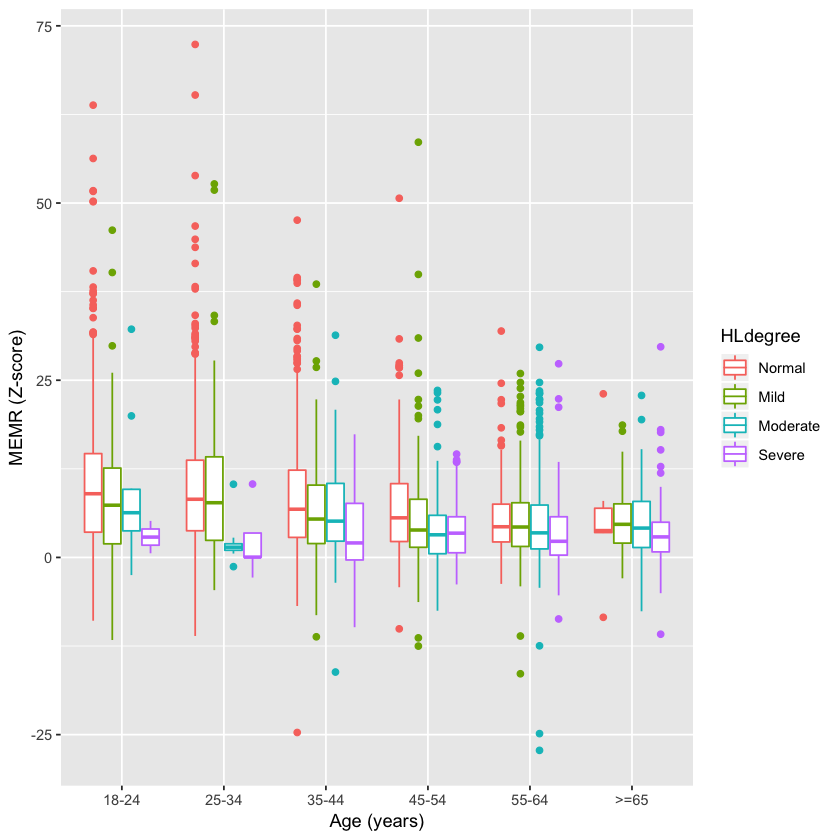

In [20]:
p <- ggplot(aes(x=decade, y=zmemr, color=HLdegree), data=dat) + geom_boxplot()
p + xlab('Age (years)') + ylab('MEMR (Z-score)')